In [2]:
# import geopandas as gpd;
# import geopy.distance;
import pandas as pd;
import numpy as np;

from sklearn import ensemble;
from sklearn.preprocessing import LabelEncoder;

import matplotlib.pyplot as plt;


# import warnings;
# warnings.filterwarnings("ignore");

from sklearn.model_selection import train_test_split;
pd.options.display.max_columns = 250;

In [168]:
typedict = {#'PID' : 'nominal',
            'SalePrice' : 'Continuous',
            #Matt
            'LotFrontage' : 'Continuous', 
            'LotArea' : 'Continuous',
            #'maybe_LotShape' : 'Nominal',
            'LandSlope' : 'Nominal', 
            'LandContour' : 'Nominal', 
            #'maybe_MSZoning' : 'Nominal', 
            'Street_paved' : 'Nominal', 
            'Alley' : 'Nominal',
            'Neighborhood' : 'Nominal', 
            #'drop_LotConfig' : 'nominal', 
            #'drop_Condition1' : 'nominal', 
            #'drop_Condition2' : 'nominal',
            'Foundation' : 'Nominal',
            'Utilities' : 'Nominal',
            #'Heating' : 'Nominal',
            #'drop_HeatingQC_nom' : 'Ordinal',
            'CentralAir' : 'Nominal',
            #'drop_Electrical' : 'Nominal',
            'HeatingQC_ord' : 'Ordinal',
            'LotShape_com' : 'Nominal',
            'MSZoning_com' : 'Nominal',
            #'LF_Normal' : 'nominal',
            'LF_Near_NS_RR' : 'Nominal',
            'LF_Near_Positive_Feature' : 'Nominal',
            'LF_Adjacent_Arterial_St' : 'Nominal',
            'LF_Near_EW_RR' : 'Nominal',
            'LF_Adjacent_Feeder_St' : 'Nominal',
            'LF_Near_Postive_Feature' : 'Nominal',
            'Heating_com' : 'Nominal',
            'Electrical_com' : 'Nominal',
            'LotConfig_com' : 'Nominal', 
            'LotFrontage_log' : 'Continuous',
            'LotArea_log' : 'Continuous',
            #Oren 
            'MiscFeature': 'Nominal',
            'Fireplaces': 'Discrete',
            'FireplaceQu': 'Ordinal',
            'PoolQC': 'Ordinal',
            'PoolArea': 'Continuous',
            'PavedDrive': 'Nominal',
            'ExterQual': 'Ordinal',
            'OverallQual': 'Ordinal',
            'OverallCond': 'Ordinal',
            'MiscVal': 'Continuous',
            'YearBuilt': 'Discrete',
            'YearRemodAdd': 'Discrete',
            'KitchenQual': 'Ordinal',
            'Fence': 'Ordinal',
            'RoofStyle': 'Nominal',
            'RoofMatl': 'Nominal',
            #'maybe_Exterior1st': 'Nominal',
            #'drop_Exterior2nd': 'Nominal',
            'ExterCond': 'Ordinal',
            'MasVnrType': 'Nominal',
            'MasVnrArea': 'Continuous',
            #Mo
            #Basement
            'BsmtQual_ord': 'Ordinal',
            'BsmtCond_ord': 'Ordinal',
            'BsmtExposure_ord': 'Ordinal',
            #'BsmtQual_ord_lin': 'Ordinal',
            #'BsmtCond_ord_lin': 'Ordinal',
            #'BsmtExposure_ord_lin': 'Ordinal',
            'TotalBsmtSF': 'Continuous',
            'BSMT_GLQ':'Continuous', 
            'BSMT_Rec':'Continuous',
            'BsmtUnfSF': 'Continuous',
            'BSMT_ALQ':'Continuous',
            'BSMT_BLQ':'Continuous', 
            'BSMT_LwQ':'Continuous', 
            #'drop_BsmtQual': 'Nominal',
            #'drop_BsmtCond': 'Nominal',
            #'drop_BsmtExposure': 'Nominal',
            #'drop_BsmtFinType1': 'Nominal',
            #'drop_BsmtFinSF1': 'Continuous',
            #'drop_BsmtFinType2': 'Nominal',
            #'drop_BsmtFinSF2': 'Continuous',
            #Deck
            'WoodDeckSF':'Continuous', 
            'OpenPorchSF':'Continuous', 
            'ScreenPorch':'Continuous',
            'EnclosedPorch':'Continuous',
            '3SsnPorch':'Continuous',
            #Garage
            'GarageFinish':'Nominal', 
            'GarageYrBlt':'Continuous',
            'GarageCars':'Ordinal',
            'GarageArea':'Continuous',
            'GarageType_com':'Nominal',
            'GarageQual':'Nominal', 
            'GarageCond':'Nominal',
            #'drop_GarageType':'Nominal',

            # Hao-Wei
            "SaleType": "Nominal",
            "BldgType": "Nominal",
            "Functional_ord": "Ordinal", # Changed from "Functional"
            "1stFlrSF": "Continuous",
            "2ndFlrSF": "Continuous",
            "LowQualFinSF": "Continuous", # Rejectable p-value
            "GrLivArea": "Continuous",
            "BsmtFullBath": "Discrete",
            "BsmtHalfBath": "Discrete", # Rejectable p-value
            "FullBath": "Discrete",
            "HalfBath": "Discrete",
            "BedroomAbvGr": "Discrete",
            "KitchenAbvGr": "Discrete",
            "TotRmsAbvGrd": "Discrete",
            "MoSold": "Discrete", # Rejectable p-value
            "YrSold": "Discrete", # Rejectable p-value
            ####### Below are columns created by myself #######
            #"Functional_dis": "Discrete", # Functional in a (Salvage) 0-7 (Full) scale.
            "1stFlrSF_log": "Continuous",
            "2ndFlrSF_log": "Continuous",
            "GrLivArea_log": "Continuous",
            "number_floors": "Discrete",
            "attic": "Ordinal",
            "PUD": "Nominal",
            #### Whose?
            "SaleCondition": "Nominal",
            "SalePrice_log": "Continuous",
            #"drop_MS_Coded": "Nominal",
            "sold_datetime": "Discrete",
    
            #### New in version 3:
            'ext_Wood_Siding': "Discrete",
            'ext_Hard_Board': "Discrete",
            'ext_Metal_Siding': "Discrete",
            'ext_Vinyl_Siding': "Discrete",
            'ext_Wood_Shingles': "Discrete",
            'ext_Plywood': "Discrete",
            'ext_Stucco': "Discrete",
            'ext_Cement_Board': "Discrete",
            'ext_Face_Brick': "Discrete",
            'ext_Asbestos_Shingles': "Discrete",
            'ext_Common_Brick': "Discrete",
            'ext_Imitation_Stucco': "Discrete",
            'ext_Other': "Discrete",
            'sold_age_years': "Continuous"
}

In [169]:
housing.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,Street_paved,Alley,LandContour,Utilities,LandSlope,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log,HeatingQC_ord,LotShape_com,MSZoning_com,LF_Near_NS_RR,LF_Near_Positive_Feature,LF_Adjacent_Arterial_St,LF_Near_EW_RR,LF_Adjacent_Feeder_St,LF_Near_Postive_Feature,Heating_com,Electrical_com,LotConfig_com,LotFrontage_log,LotArea_log,ext_Wood_Siding,ext_Hard_Board,ext_Metal_Siding,ext_Vinyl_Siding,ext_Wood_Shingles,ext_Plywood,ext_Stucco,ext_Cement_Board,ext_Face_Brick,ext_Asbestos_Shingles,ext_Common_Brick,ext_Imitation_Stucco,ext_Other,BsmtCond_ord,BsmtQual_ord,BsmtExposure_ord,BSMT_GLQ,BSMT_ALQ,BSMT_BLQ,BSMT_LwQ,BSMT_Rec,GarageType_com,number_floors,attic,PUD,Functional_ord,1stFlrSF_log,2ndFlrSF_log,GrLivArea_log,sold_datetime,sold_age_years
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,856,126000,177.651344,7890,Pave,No alley access,Level,EGWS,Gentle,SWISU,1Fam,6,6,1939,1950,Gable,Standard (Composite) Shingle,None,0.0,3,3,CBlock,618.0,856.0,Y,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,1939.0,Unf,2.0,399.0,3,3,Paved,0,0,0,0,166,0,0,No Fence,Nothing,0,3,2010,WD,Normal,5.100371,3,Regular,"Residential, low-density",0.0,0.0,0.0,0.0,0.0,0.0,Gas-powered forced-air heating,"Standard circuit breakers, all Romex wiring",Corner lot,5.179823,3.897077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,0.0,0.0,0.0,0.0,238.0,Detached,1,No attic,0,7,2.932474,0.000000,2.932474,2010-03-01,71.210959
905476230,1049,139500,42.000000,4235,Pave,No alley access,Level,EGWS,Gentle,Edwards,TwnhsE,5,5,1984,1984,Gable,Standard (Composite) Shingle,Brick Face,149.0,4,3,CBlock,104.0,1049.0,Y,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,0,1984.0,Fin,1.0,266.0,3,3,Paved,0,105,0,0,0,0,0,No Fence,Nothing,0,2,2009,WD,Normal,5.144574,3,Regular,"Residential, low-density",0.0,0.0,0.0,0.0,0.0,0.0,Gas-powered forced-air heating,"Standard circuit breakers, all Romex wiring",Inside lot (1 side frontage),3.737670,3.626853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,2,552.0,393.0,0.0,0.0,0.0,Attached,1,No attic,1,7,3.020775,0.000000,3.020775,2009-02-01,25.104110
911128020,1001,124900,60.000000,6060,Pave,No alley access,Level,EGWS,Gentle,IDOTRR,1Fam,5,9,1930,2007,Hip,Standard (Composite) Shingle,None,0.0,4,3,BrkTil,100.0,837.0,Y,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,0,1930.0,Unf,1.0,216.0,3,1,Dirt Gravel,154,0,42,86,0,0,0,No Fence,Nothing,0,11,2007,WD,Normal,5.096562,5,Regular,Nonresidential,0.0,0.0,0.0,0.0,0.0,0.0,Gas-powered forced-air heating,"Standard circuit breakers, all Romex wiring",Inside lot (1 side frontage),4.094345,3.782473,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,0.0,737.0,0.0,0.0,0.0,Detached,1,No attic,0,7,3.000434,0.000000,3.000434,2007-11-01,77.884932
535377150,1039,114000,80.000000,8146,Pave,No alley access,Level,EGWS,Gentle,OldTown,1Fam,4,8,1900,2003,Gable,Standard (Composite) Shingle,None,0.0,4,4,BrkTil,405.0,405.0,Y,717,322,0,0.0,0.0,1,0,2,1,3,6,0,0,1940.0,Unf,1.0,281.0,3,3,Dirt Gravel,0,0,168,0,111,0,0,No Fence,Nothing,0,5,2009,WD,Normal,5.056905,4,Regular,"Residential, low-density",0.0,0.0,0.0,0.0,0.0,0.0,Gas-powered forced-air heating,"Standard circuit breakers, all Romex wiring",Corner lot,4.382027,3.910944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1,0.0,0.0,0.0,0.0,0.0,Detached,2,No attic,0,7,2.855519,2.509203,3.016616,2009-05-01,109.402740
534177230,1665,227000,70.000000,8400,Pave,No alley access,Level,EGWS,Gentle,NWAme

In [62]:
keys_list = list(typedict.keys());
house_list = housing.columns;


for k in keys_list:
    if k not in house_list:
        print(k);

for k in house_list:
    if k not in keys_list:
        print(k);


In [170]:
housing_coords = pd.read_csv('../data/house_coordinates_0.25.csv', index_col = 0);

In [3]:
housing = pd.read_csv('../data/ames_housing_price_data_v3.csv', index_col = 0);

In [172]:
test = housing.merge(housing_coords, how = "inner", left_index = True, right_index = True);

In [173]:
test = housing_coords.drop(["Address", "Coords4", "latitude", "longitude"], axis = 1);

In [174]:
test.sort_values("PID", ascending = True, inplace = True);

In [175]:
test2 = test.merge(housing["SalePrice"], left_index = True, right_index = True);

### Data preparation for gradient boosting methods

In [176]:
attic_dict = {"No attic": 0, "Finished": 2, "Unfinished": 1};
fence_dict = {"No Fence": 0, "Minimum Privacy": 3, "Good Privacy": 4, "Good Wood": 2 , "Minimum Wood/Wire": 1};

In [177]:
x.shape

(2579, 235)

In [178]:
y = housing["SalePrice"];
ylog = housing["SalePrice_log"];

x = housing.drop(["SalePrice", "SalePrice_log"], axis = 1);

In [179]:
# Drop the column sold_datetime and replace with a column which computes the time elapsed since 2006-01.
# I don't like sold_datetime much, and sklearn often have difficulty understanding it.

x.drop("sold_datetime", axis = 1, inplace = True);
x["Months_Elapsed"] = 12*(x["YrSold"]-2006) + x["MoSold"];
x["attic"] = x.apply(lambda t: attic_dict[t["attic"]], axis = 1);
x["Fence"] = x.apply(lambda t: fence_dict[t["Fence"]], axis = 1);

typedict["Months_Elapsed"] = "Discrete";

In [180]:
col_num = [w for w in x.columns if typedict[w] in ["Continuous", "Discrete", "Ordinal"]];
col_nom = [w for w in x.columns if typedict[w] == "Nominal"];
# TODO: Not avery ordinal variables are in the machine understandable way.
# Fix: HeatingQC_nom, Fence, attic

x_num = x[col_num];
x_nom = x[col_nom];

In [181]:
# Encode all nominal and ordinal variables.

lencoder = LabelEncoder();

temp = pd.DataFrame({"SalePrice": y});
for col_name in col_nom:
    # temp = lencoder.fit_transform(np.array(str(x[[col_name]])).reshape(-1,1));
    temp[col_name] = np.array(lencoder.fit_transform(x[col_name].astype(str))).reshape(-1,1);
    
temp.drop("SalePrice", axis = 1, inplace = True);

In [182]:
# Add the positional data here later.
x = pd.concat([x_num, temp], axis = 1);

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0);

### Cat boosting

In [195]:
from catboost import Pool, CatBoostRegressor;

cat = CatBoostRegressor();
cat.set_params(random_state=0);
cat.fit(x_train, y_train);

Learning rate set to 0.043356
0:	learn: 72520.1161903	total: 11.3ms	remaining: 11.3s
1:	learn: 70379.7315535	total: 21.9ms	remaining: 10.9s
2:	learn: 68275.4318536	total: 33.3ms	remaining: 11.1s
3:	learn: 66435.7073847	total: 44.1ms	remaining: 11s
4:	learn: 64587.3762679	total: 54.6ms	remaining: 10.9s
5:	learn: 62856.3793766	total: 65.5ms	remaining: 10.8s
6:	learn: 61235.0914682	total: 77.4ms	remaining: 11s
7:	learn: 59588.1539515	total: 88.5ms	remaining: 11s
8:	learn: 58028.5709438	total: 99.1ms	remaining: 10.9s
9:	learn: 56515.6507058	total: 110ms	remaining: 10.9s
10:	learn: 55187.7381824	total: 120ms	remaining: 10.8s
11:	learn: 53912.1039605	total: 130ms	remaining: 10.7s
12:	learn: 52661.6839867	total: 140ms	remaining: 10.6s
13:	learn: 51299.5996920	total: 150ms	remaining: 10.6s
14:	learn: 50055.9142144	total: 160ms	remaining: 10.5s
15:	learn: 48877.3002739	total: 170ms	remaining: 10.5s
16:	learn: 47712.4477313	total: 180ms	remaining: 10.4s
17:	learn: 46639.1276094	total: 191ms	rema

149:	learn: 17404.7060338	total: 1.52s	remaining: 8.6s
150:	learn: 17367.3748729	total: 1.52s	remaining: 8.57s
151:	learn: 17316.5639704	total: 1.53s	remaining: 8.54s
152:	learn: 17277.8927456	total: 1.54s	remaining: 8.51s
153:	learn: 17216.1007679	total: 1.54s	remaining: 8.48s
154:	learn: 17169.0510046	total: 1.55s	remaining: 8.45s
155:	learn: 17123.7382405	total: 1.56s	remaining: 8.42s
156:	learn: 17077.2395109	total: 1.56s	remaining: 8.39s
157:	learn: 17032.0643793	total: 1.57s	remaining: 8.37s
158:	learn: 16992.7275816	total: 1.57s	remaining: 8.33s
159:	learn: 16956.6565412	total: 1.58s	remaining: 8.3s
160:	learn: 16913.4649431	total: 1.58s	remaining: 8.26s
161:	learn: 16864.6957754	total: 1.59s	remaining: 8.22s
162:	learn: 16826.1468062	total: 1.59s	remaining: 8.18s
163:	learn: 16805.6544051	total: 1.6s	remaining: 8.14s
164:	learn: 16778.1537030	total: 1.6s	remaining: 8.1s
165:	learn: 16731.1836310	total: 1.6s	remaining: 8.06s
166:	learn: 16687.0088850	total: 1.61s	remaining: 8.03

307:	learn: 12889.7094703	total: 2.44s	remaining: 5.47s
308:	learn: 12868.0919577	total: 2.44s	remaining: 5.46s
309:	learn: 12838.5756287	total: 2.45s	remaining: 5.45s
310:	learn: 12833.0454743	total: 2.45s	remaining: 5.44s
311:	learn: 12814.4319935	total: 2.46s	remaining: 5.43s
312:	learn: 12786.6014803	total: 2.47s	remaining: 5.42s
313:	learn: 12771.6071083	total: 2.47s	remaining: 5.41s
314:	learn: 12739.0939228	total: 2.48s	remaining: 5.39s
315:	learn: 12719.9230648	total: 2.49s	remaining: 5.38s
316:	learn: 12699.2757735	total: 2.5s	remaining: 5.38s
317:	learn: 12680.1032593	total: 2.5s	remaining: 5.36s
318:	learn: 12670.7553559	total: 2.51s	remaining: 5.35s
319:	learn: 12654.6300457	total: 2.51s	remaining: 5.34s
320:	learn: 12630.1131023	total: 2.52s	remaining: 5.33s
321:	learn: 12611.8863840	total: 2.53s	remaining: 5.32s
322:	learn: 12587.9191600	total: 2.53s	remaining: 5.31s
323:	learn: 12571.1357902	total: 2.54s	remaining: 5.3s
324:	learn: 12545.1406762	total: 2.54s	remaining: 5

477:	learn: 10385.9857232	total: 3.5s	remaining: 3.82s
478:	learn: 10370.3307812	total: 3.51s	remaining: 3.82s
479:	learn: 10360.9663564	total: 3.52s	remaining: 3.81s
480:	learn: 10346.0100724	total: 3.52s	remaining: 3.8s
481:	learn: 10334.0894991	total: 3.53s	remaining: 3.79s
482:	learn: 10317.9657285	total: 3.54s	remaining: 3.78s
483:	learn: 10297.3277299	total: 3.54s	remaining: 3.78s
484:	learn: 10291.0291273	total: 3.55s	remaining: 3.77s
485:	learn: 10280.6686200	total: 3.56s	remaining: 3.76s
486:	learn: 10268.1739508	total: 3.56s	remaining: 3.75s
487:	learn: 10256.6687562	total: 3.57s	remaining: 3.75s
488:	learn: 10243.9955878	total: 3.58s	remaining: 3.74s
489:	learn: 10233.1559818	total: 3.58s	remaining: 3.73s
490:	learn: 10221.1030149	total: 3.59s	remaining: 3.72s
491:	learn: 10218.1525656	total: 3.6s	remaining: 3.71s
492:	learn: 10202.7033340	total: 3.6s	remaining: 3.7s
493:	learn: 10200.7130213	total: 3.61s	remaining: 3.69s
494:	learn: 10184.7287338	total: 3.62s	remaining: 3.6

650:	learn: 8567.2084067	total: 4.58s	remaining: 2.45s
651:	learn: 8560.2504738	total: 4.58s	remaining: 2.45s
652:	learn: 8549.6490982	total: 4.59s	remaining: 2.44s
653:	learn: 8544.0102423	total: 4.59s	remaining: 2.43s
654:	learn: 8535.2565673	total: 4.6s	remaining: 2.42s
655:	learn: 8525.3114737	total: 4.61s	remaining: 2.42s
656:	learn: 8519.6901255	total: 4.61s	remaining: 2.41s
657:	learn: 8512.5916672	total: 4.62s	remaining: 2.4s
658:	learn: 8506.4231729	total: 4.63s	remaining: 2.39s
659:	learn: 8494.5864663	total: 4.63s	remaining: 2.39s
660:	learn: 8480.5563513	total: 4.64s	remaining: 2.38s
661:	learn: 8474.1497265	total: 4.65s	remaining: 2.37s
662:	learn: 8462.2395230	total: 4.65s	remaining: 2.36s
663:	learn: 8457.7548040	total: 4.66s	remaining: 2.36s
664:	learn: 8447.4260334	total: 4.66s	remaining: 2.35s
665:	learn: 8436.2885816	total: 4.67s	remaining: 2.34s
666:	learn: 8425.6306239	total: 4.68s	remaining: 2.33s
667:	learn: 8420.3241198	total: 4.68s	remaining: 2.33s
668:	learn: 

818:	learn: 7291.2067558	total: 5.65s	remaining: 1.25s
819:	learn: 7286.1879890	total: 5.66s	remaining: 1.24s
820:	learn: 7278.2258350	total: 5.67s	remaining: 1.24s
821:	learn: 7274.0984085	total: 5.67s	remaining: 1.23s
822:	learn: 7259.5901587	total: 5.68s	remaining: 1.22s
823:	learn: 7254.1824525	total: 5.68s	remaining: 1.21s
824:	learn: 7246.0856384	total: 5.69s	remaining: 1.21s
825:	learn: 7238.9737167	total: 5.7s	remaining: 1.2s
826:	learn: 7230.4715812	total: 5.7s	remaining: 1.19s
827:	learn: 7223.6609195	total: 5.71s	remaining: 1.19s
828:	learn: 7217.0076544	total: 5.71s	remaining: 1.18s
829:	learn: 7216.4573580	total: 5.72s	remaining: 1.17s
830:	learn: 7209.1797522	total: 5.73s	remaining: 1.16s
831:	learn: 7203.2241448	total: 5.73s	remaining: 1.16s
832:	learn: 7192.8708397	total: 5.74s	remaining: 1.15s
833:	learn: 7184.4202811	total: 5.75s	remaining: 1.14s
834:	learn: 7176.9180378	total: 5.75s	remaining: 1.14s
835:	learn: 7166.4171178	total: 5.76s	remaining: 1.13s
836:	learn: 7

969:	learn: 6298.4777530	total: 6.56s	remaining: 203ms
970:	learn: 6292.3075770	total: 6.57s	remaining: 196ms
971:	learn: 6285.2244122	total: 6.58s	remaining: 189ms
972:	learn: 6278.9549074	total: 6.58s	remaining: 183ms
973:	learn: 6270.7673548	total: 6.59s	remaining: 176ms
974:	learn: 6265.6569888	total: 6.59s	remaining: 169ms
975:	learn: 6261.3682588	total: 6.6s	remaining: 162ms
976:	learn: 6256.4976831	total: 6.61s	remaining: 156ms
977:	learn: 6251.7909109	total: 6.61s	remaining: 149ms
978:	learn: 6249.4506569	total: 6.62s	remaining: 142ms
979:	learn: 6243.3550548	total: 6.62s	remaining: 135ms
980:	learn: 6238.5730118	total: 6.63s	remaining: 128ms
981:	learn: 6238.1687525	total: 6.63s	remaining: 122ms
982:	learn: 6231.7380020	total: 6.64s	remaining: 115ms
983:	learn: 6228.8854364	total: 6.65s	remaining: 108ms
984:	learn: 6224.4596634	total: 6.65s	remaining: 101ms
985:	learn: 6218.5011805	total: 6.66s	remaining: 94.5ms
986:	learn: 6215.9319651	total: 6.66s	remaining: 87.8ms
987:	lear

In [196]:
print(cat.score(x_train, y_train));
print(cat.score(x_test, y_test)); # Best in the congress so far. 0.9487

0.9931924033658027
0.9487773804496179


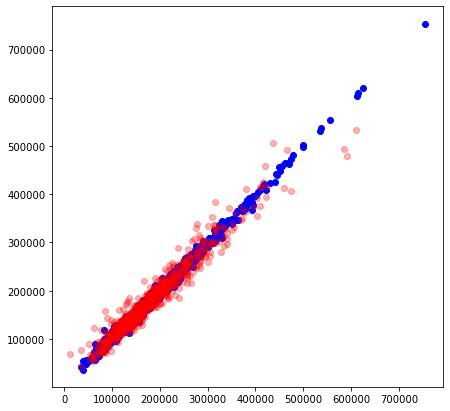

In [197]:
pred_train = cat.predict(x_train);
pred_test = cat.predict(x_test);

from matplotlib.pyplot import figure;

figure(figsize=(7,7));
plt.scatter(y_train, pred_train, color = 'b');
plt.scatter(y_test, pred_test, color = 'r', alpha=0.3);
plt.show();

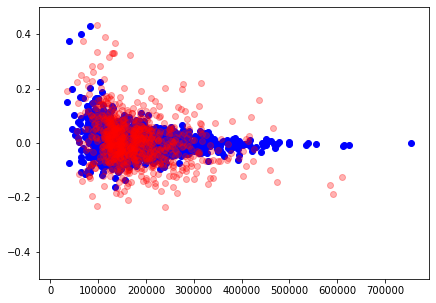

In [134]:
figure(figsize=(7,5));
plt.scatter(y_train, (pred_train-y_train)/y_train, color = 'b');
plt.scatter(y_test, (pred_test-y_test)/y_test, color = 'r', alpha=0.3);
plt.ylim([-0.5,0.5]);
plt.show();

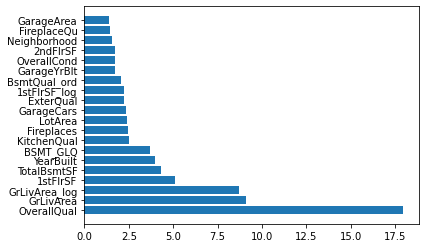

In [135]:
feature_importance = pd.DataFrame({"Features": x.columns, "Importance":cat.feature_importances_});
feature_importance.sort_values("Importance", ascending = False, inplace=True);

temp = feature_importance.iloc[:20,]
plt.barh(temp["Features"], temp["Importance"]);

In [199]:
### How many of the test datas are within 20% error?
print(sum(abs((pred_test-y_test)/y_test) <= 0.2)/y_test.shape[0]*100, "percent of the test data are predicted with < 20% error.")
print(sum(abs((pred_test-y_test)/y_test) <= 0.1)/y_test.shape[0]*100, "percent of the test data are predicted with < 10% error.") # ~78.2% of the test data have error < 10%
print(sum(abs((pred_test-y_test)/y_test) <= .05)/y_test.shape[0]*100, "percent of the test data are predicted with <  5% error.") # ~49.6% of the test data have error < 5%

95.60723514211887 percent of the test data are predicted with < 20% error.
78.16537467700259 percent of the test data are predicted with < 10% error.
49.6124031007752 percent of the test data are predicted with <  5% error.


### Cat boosting with location information included

In [200]:
x2 = x.merge(test, how="inner", left_index = True, right_index = True);

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=0);

In [202]:
cat = CatBoostRegressor();
cat.set_params(random_state=0);
cat.fit(x_train, y_train);

Learning rate set to 0.043356
0:	learn: 72500.6788743	total: 9.57ms	remaining: 9.56s
1:	learn: 70451.4322446	total: 18.3ms	remaining: 9.13s
2:	learn: 68525.3530016	total: 27.1ms	remaining: 9.02s
3:	learn: 66650.2010239	total: 35.9ms	remaining: 8.93s
4:	learn: 64847.3846152	total: 43.8ms	remaining: 8.72s
5:	learn: 63174.2661093	total: 52.3ms	remaining: 8.66s
6:	learn: 61534.6256897	total: 60.8ms	remaining: 8.63s
7:	learn: 59973.1402216	total: 69.3ms	remaining: 8.59s
8:	learn: 58349.4134858	total: 77.9ms	remaining: 8.57s
9:	learn: 56742.2347000	total: 86.3ms	remaining: 8.54s
10:	learn: 55381.3184309	total: 94.8ms	remaining: 8.53s
11:	learn: 53980.2557666	total: 103ms	remaining: 8.51s
12:	learn: 52662.6690333	total: 112ms	remaining: 8.48s
13:	learn: 51357.3079491	total: 120ms	remaining: 8.45s
14:	learn: 50233.9424982	total: 128ms	remaining: 8.42s
15:	learn: 49064.7359910	total: 137ms	remaining: 8.41s
16:	learn: 47970.9583952	total: 145ms	remaining: 8.38s
17:	learn: 46836.8000769	total: 15

155:	learn: 17035.7648541	total: 1.31s	remaining: 7.09s
156:	learn: 16991.5269753	total: 1.32s	remaining: 7.08s
157:	learn: 16956.9770077	total: 1.33s	remaining: 7.07s
158:	learn: 16918.6415986	total: 1.33s	remaining: 7.06s
159:	learn: 16887.1862065	total: 1.34s	remaining: 7.05s
160:	learn: 16841.5921703	total: 1.35s	remaining: 7.04s
161:	learn: 16795.4647422	total: 1.36s	remaining: 7.03s
162:	learn: 16750.6594824	total: 1.37s	remaining: 7.02s
163:	learn: 16721.2057797	total: 1.38s	remaining: 7.01s
164:	learn: 16668.6826940	total: 1.38s	remaining: 7s
165:	learn: 16639.0812298	total: 1.39s	remaining: 6.99s
166:	learn: 16600.6810250	total: 1.41s	remaining: 7.03s
167:	learn: 16562.3366630	total: 1.42s	remaining: 7.02s
168:	learn: 16522.0175337	total: 1.43s	remaining: 7.01s
169:	learn: 16489.0435414	total: 1.43s	remaining: 7s
170:	learn: 16451.2274688	total: 1.44s	remaining: 6.99s
171:	learn: 16393.4521323	total: 1.45s	remaining: 6.98s
172:	learn: 16358.1685120	total: 1.46s	remaining: 6.97

312:	learn: 12647.1183455	total: 2.61s	remaining: 5.73s
313:	learn: 12625.7554357	total: 2.62s	remaining: 5.72s
314:	learn: 12599.1893378	total: 2.63s	remaining: 5.71s
315:	learn: 12577.9532134	total: 2.64s	remaining: 5.71s
316:	learn: 12563.0929756	total: 2.64s	remaining: 5.7s
317:	learn: 12560.2557037	total: 2.65s	remaining: 5.69s
318:	learn: 12537.4786440	total: 2.66s	remaining: 5.68s
319:	learn: 12511.4254235	total: 2.67s	remaining: 5.67s
320:	learn: 12488.5063899	total: 2.68s	remaining: 5.67s
321:	learn: 12469.6756531	total: 2.69s	remaining: 5.66s
322:	learn: 12452.3681087	total: 2.69s	remaining: 5.65s
323:	learn: 12432.5030549	total: 2.7s	remaining: 5.64s
324:	learn: 12415.7859972	total: 2.71s	remaining: 5.63s
325:	learn: 12396.0848105	total: 2.72s	remaining: 5.62s
326:	learn: 12393.7851843	total: 2.73s	remaining: 5.61s
327:	learn: 12366.9793014	total: 2.73s	remaining: 5.6s
328:	learn: 12345.9798184	total: 2.74s	remaining: 5.59s
329:	learn: 12331.5782161	total: 2.75s	remaining: 5

480:	learn: 10092.5478014	total: 3.93s	remaining: 4.24s
481:	learn: 10076.1622098	total: 3.94s	remaining: 4.23s
482:	learn: 10065.4904636	total: 3.94s	remaining: 4.22s
483:	learn: 10057.4676666	total: 3.95s	remaining: 4.21s
484:	learn: 10037.3309022	total: 3.96s	remaining: 4.21s
485:	learn: 10017.1492085	total: 3.97s	remaining: 4.2s
486:	learn: 10004.3404211	total: 3.98s	remaining: 4.19s
487:	learn: 9987.9891909	total: 3.98s	remaining: 4.18s
488:	learn: 9974.4541498	total: 3.99s	remaining: 4.17s
489:	learn: 9963.0931217	total: 4s	remaining: 4.16s
490:	learn: 9952.5605424	total: 4.01s	remaining: 4.16s
491:	learn: 9937.8473942	total: 4.02s	remaining: 4.15s
492:	learn: 9927.1776751	total: 4.03s	remaining: 4.14s
493:	learn: 9911.3694732	total: 4.03s	remaining: 4.13s
494:	learn: 9896.2260552	total: 4.04s	remaining: 4.12s
495:	learn: 9878.7038909	total: 4.06s	remaining: 4.13s
496:	learn: 9866.3427517	total: 4.06s	remaining: 4.11s
497:	learn: 9848.3211174	total: 4.07s	remaining: 4.1s
498:	lea

650:	learn: 8239.3387250	total: 5.27s	remaining: 2.83s
651:	learn: 8232.0004776	total: 5.28s	remaining: 2.82s
652:	learn: 8231.1594877	total: 5.29s	remaining: 2.81s
653:	learn: 8229.1678408	total: 5.29s	remaining: 2.8s
654:	learn: 8225.4436894	total: 5.3s	remaining: 2.79s
655:	learn: 8215.2156440	total: 5.31s	remaining: 2.79s
656:	learn: 8214.5944727	total: 5.32s	remaining: 2.78s
657:	learn: 8213.8017164	total: 5.33s	remaining: 2.77s
658:	learn: 8207.9287249	total: 5.33s	remaining: 2.76s
659:	learn: 8196.1004674	total: 5.34s	remaining: 2.75s
660:	learn: 8187.6008398	total: 5.35s	remaining: 2.74s
661:	learn: 8178.5334450	total: 5.36s	remaining: 2.73s
662:	learn: 8170.5809235	total: 5.37s	remaining: 2.73s
663:	learn: 8160.7522685	total: 5.37s	remaining: 2.72s
664:	learn: 8146.8552994	total: 5.38s	remaining: 2.71s
665:	learn: 8135.8449284	total: 5.39s	remaining: 2.7s
666:	learn: 8125.6669002	total: 5.39s	remaining: 2.69s
667:	learn: 8114.9175559	total: 5.4s	remaining: 2.69s
668:	learn: 81

800:	learn: 7124.9557374	total: 6.42s	remaining: 1.59s
801:	learn: 7110.5824818	total: 6.43s	remaining: 1.59s
802:	learn: 7105.2654571	total: 6.44s	remaining: 1.58s
803:	learn: 7089.9105502	total: 6.45s	remaining: 1.57s
804:	learn: 7089.1674766	total: 6.46s	remaining: 1.56s
805:	learn: 7082.4442943	total: 6.46s	remaining: 1.56s
806:	learn: 7068.3644069	total: 6.47s	remaining: 1.55s
807:	learn: 7067.6984734	total: 6.48s	remaining: 1.54s
808:	learn: 7060.9518424	total: 6.49s	remaining: 1.53s
809:	learn: 7049.6245104	total: 6.5s	remaining: 1.52s
810:	learn: 7039.4273503	total: 6.5s	remaining: 1.51s
811:	learn: 7030.9394197	total: 6.51s	remaining: 1.51s
812:	learn: 7026.9373502	total: 6.52s	remaining: 1.5s
813:	learn: 7022.7355466	total: 6.53s	remaining: 1.49s
814:	learn: 7013.5885996	total: 6.54s	remaining: 1.48s
815:	learn: 7004.5302338	total: 6.54s	remaining: 1.48s
816:	learn: 6996.5710375	total: 6.55s	remaining: 1.47s
817:	learn: 6987.0830346	total: 6.56s	remaining: 1.46s
818:	learn: 6

964:	learn: 6166.6307064	total: 7.77s	remaining: 282ms
965:	learn: 6161.5055110	total: 7.78s	remaining: 274ms
966:	learn: 6154.4427498	total: 7.79s	remaining: 266ms
967:	learn: 6153.9076465	total: 7.79s	remaining: 258ms
968:	learn: 6145.1462488	total: 7.8s	remaining: 250ms
969:	learn: 6140.0658975	total: 7.81s	remaining: 242ms
970:	learn: 6135.4124856	total: 7.82s	remaining: 234ms
971:	learn: 6131.1852548	total: 7.83s	remaining: 225ms
972:	learn: 6126.5373264	total: 7.83s	remaining: 217ms
973:	learn: 6118.4627497	total: 7.84s	remaining: 209ms
974:	learn: 6111.9503295	total: 7.85s	remaining: 201ms
975:	learn: 6103.0205646	total: 7.86s	remaining: 193ms
976:	learn: 6102.7339049	total: 7.86s	remaining: 185ms
977:	learn: 6093.6154510	total: 7.87s	remaining: 177ms
978:	learn: 6086.2571563	total: 7.88s	remaining: 169ms
979:	learn: 6083.0842847	total: 7.89s	remaining: 161ms
980:	learn: 6074.8438736	total: 7.89s	remaining: 153ms
981:	learn: 6071.8450284	total: 7.9s	remaining: 145ms
982:	learn: 

In [203]:
print(cat.score(x_train, y_train));
print(cat.score(x_test, y_test)); # Best in the congress so far. 0.9499

0.9935943778627069
0.9499173684661532


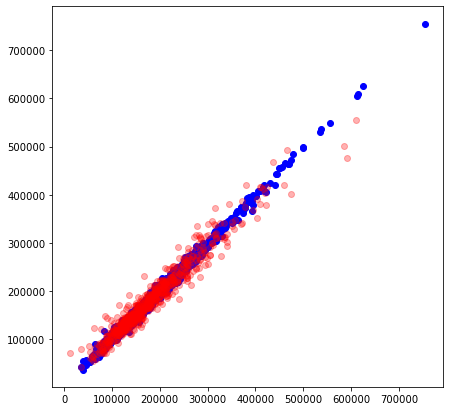

In [204]:
pred_train = cat.predict(x_train);
pred_test = cat.predict(x_test);

from matplotlib.pyplot import figure;

figure(figsize=(7,7));
plt.scatter(y_train, pred_train, color = 'b');
plt.scatter(y_test, pred_test, color = 'r', alpha=0.3);
plt.show();

In [205]:
### How many of the test datas are within 20% error?
print(sum(abs((pred_test-y_test)/y_test) <= 0.2)/y_test.shape[0]*100, "percent of the test data are predicted with < 20% error.")
print(sum(abs((pred_test-y_test)/y_test) <= 0.1)/y_test.shape[0]*100, "percent of the test data are predicted with < 10% error.") # ~78.2% of the test data have error < 10%
print(sum(abs((pred_test-y_test)/y_test) <= .05)/y_test.shape[0]*100, "percent of the test data are predicted with <  5% error.") # ~49.6% of the test data have error < 5%

95.60723514211887 percent of the test data are predicted with < 20% error.
78.0361757105943 percent of the test data are predicted with < 10% error.
50.64599483204134 percent of the test data are predicted with <  5% error.


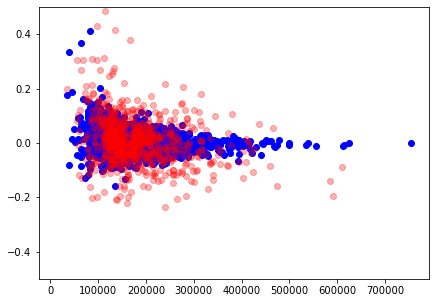

In [164]:
figure(figsize=(7,5));
plt.scatter(y_train, (pred_train-y_train)/y_train, color = 'b');
plt.scatter(y_test, (pred_test-y_test)/y_test, color = 'r', alpha=0.3);
plt.ylim([-0.5,0.5]);
plt.show();

### Bulk testing

In [213]:
training_accuracy_1 = [];
testing_accuracy_1 = [];
training_accuracy_2 = [];
testing_accuracy_2 = [];

for i in range(100):
    print(i, "-th trial without vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_1.append(cat.score(x_train, y_train));
    testing_accuracy_1.append(cat.score(x_test, y_test));
    
for i in range(100):
    print(i, "-th trial with vincinity information")
    x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3);
    
    cat = CatBoostRegressor();
    cat.set_params(verbose=0);
    cat.fit(x_train, y_train);
    
    training_accuracy_2.append(cat.score(x_train, y_train));
    testing_accuracy_2.append(cat.score(x_test, y_test));


0 -th trial without vincinity information
1 -th trial without vincinity information
2 -th trial without vincinity information
3 -th trial without vincinity information
4 -th trial without vincinity information
5 -th trial without vincinity information
6 -th trial without vincinity information
7 -th trial without vincinity information
8 -th trial without vincinity information
9 -th trial without vincinity information
10 -th trial without vincinity information
11 -th trial without vincinity information
12 -th trial without vincinity information
13 -th trial without vincinity information
14 -th trial without vincinity information
15 -th trial without vincinity information
16 -th trial without vincinity information
17 -th trial without vincinity information
18 -th trial without vincinity information
19 -th trial without vincinity information
20 -th trial without vincinity information
21 -th trial without vincinity information
22 -th trial without vincinity information
23 -th trial without 

98 -th trial with vincinity information
99 -th trial with vincinity information


In [215]:
print(sum(training_accuracy_1)/len(training_accuracy_1))
print(sum(training_accuracy_2)/len(training_accuracy_2))
print(sum(testing_accuracy_1)/len(testing_accuracy_1))
print(sum(testing_accuracy_2)/len(testing_accuracy_2))


0.9936613153919669
0.9941224796761351
0.9241698205891643
0.9279191448334513
